# Parcel matching (`state=900`)

We repeated the parcel matching experiment of the last section with high resolution parcels (`cluster-300_state-900`). The code is identical to the previous experiments, and only the paramaters used are changing.

In [1]:
import os
import numpy as np
from cneuromod_embeddings.dypac_utils import get_root_data, load_dypac
from cneuromod_embeddings.repro_summary import load_repro, visu_match

root_data = get_root_data('friends-s01')
fwhm = 5
cluster = 300
state = 900
R = load_repro(root_data=os.path.join(root_data, 'repro_friends-s01'), fwhm=fwhm, cluster=cluster, state=state)

## Intra-subject matching

In [2]:
subject = 'sub-01'
Rintra = R[subject][subject]
match_val = np.max(Rintra, axis=0)
match_pair = np.argmax(Rintra, axis=0)
order = np.argsort(-match_val)
model1, mask_img1 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")
model2, mask_img2 = load_dypac(subject=subject, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="odd")

As expected, with a high number of clusters, DYPAC identified segregated brain regions. Parcels with high levels of reproducibility are strikingly similar between the training and validation subsets of `friends-s01`. This is also true for parcels with meduim reproducibility (which is still in the near-perfect 0.9+ range, Supplementary Figure). The low reproducibility parcels seems to be parcels with no good match at all between the two subsets, and little overlap in the validation set (Supplementary Figure).

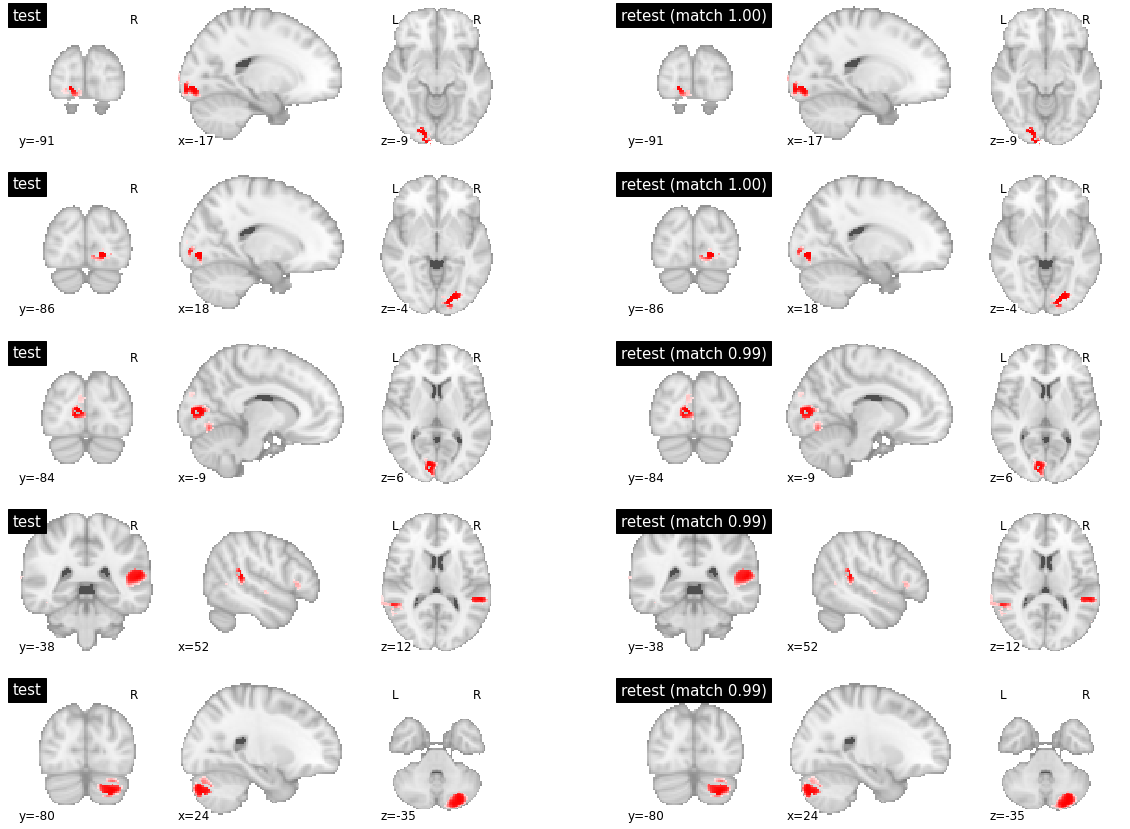

In [3]:
visu_match(0, 5, model1, model2, order, match_pair, match_val)

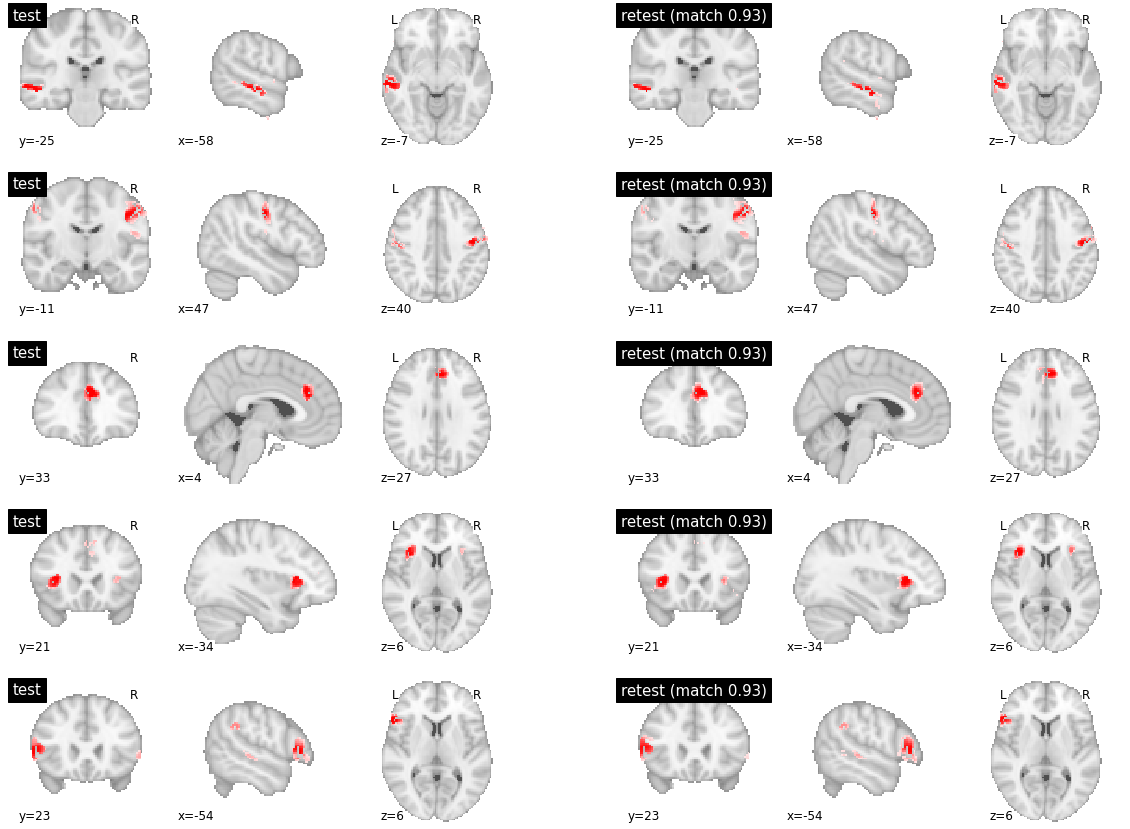

In [4]:
visu_match(450, 5, model1, model2, order, match_pair, match_val)

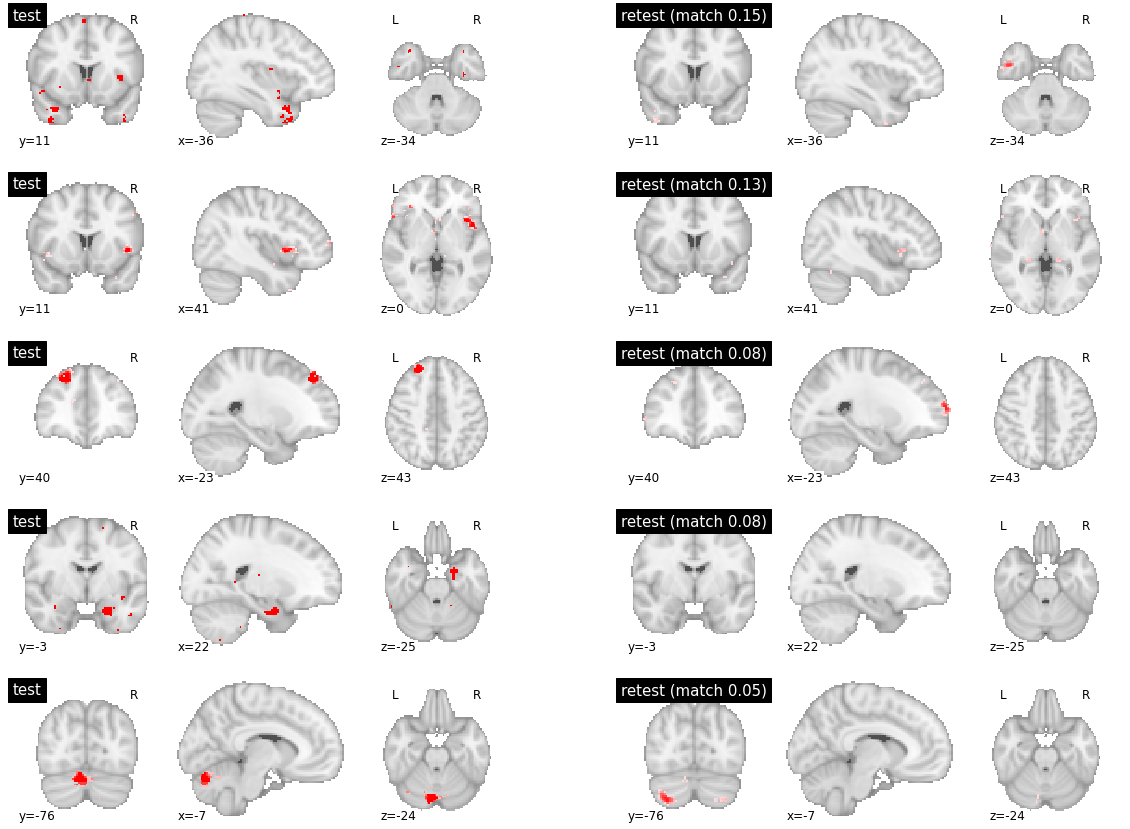

In [5]:
visu_match(850, 5, model1, model2, order, match_pair, match_val)

## Inter-subject matching

In [6]:
sub1 = 'sub-01'
sub2 = 'sub-05'
Rintra = R[sub1][sub2]
match_val = np.max(Rintra, axis=1)
match_pair = np.argmax(Rintra, axis=1)
order = np.argsort(-match_val)
model1, mask_img1 = load_dypac(subject=sub1, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")
model2, mask_img2 = load_dypac(subject=sub2, root_data=root_data, fwhm=fwhm, cluster=cluster, state=state, batch="even")

Finally, for inter-subject matching, there were highly reproducible parcels between subjects (with reproduciblity metric > 0.8), which happened to be located in subcortical structures. The parcels with medium reproducibility had marked variations in their boundaries (with reproducibility values around 0.4). Finally, the low reproducibility parcels simply had no good match and covered different brain territories (reproducibility values below 0.1).

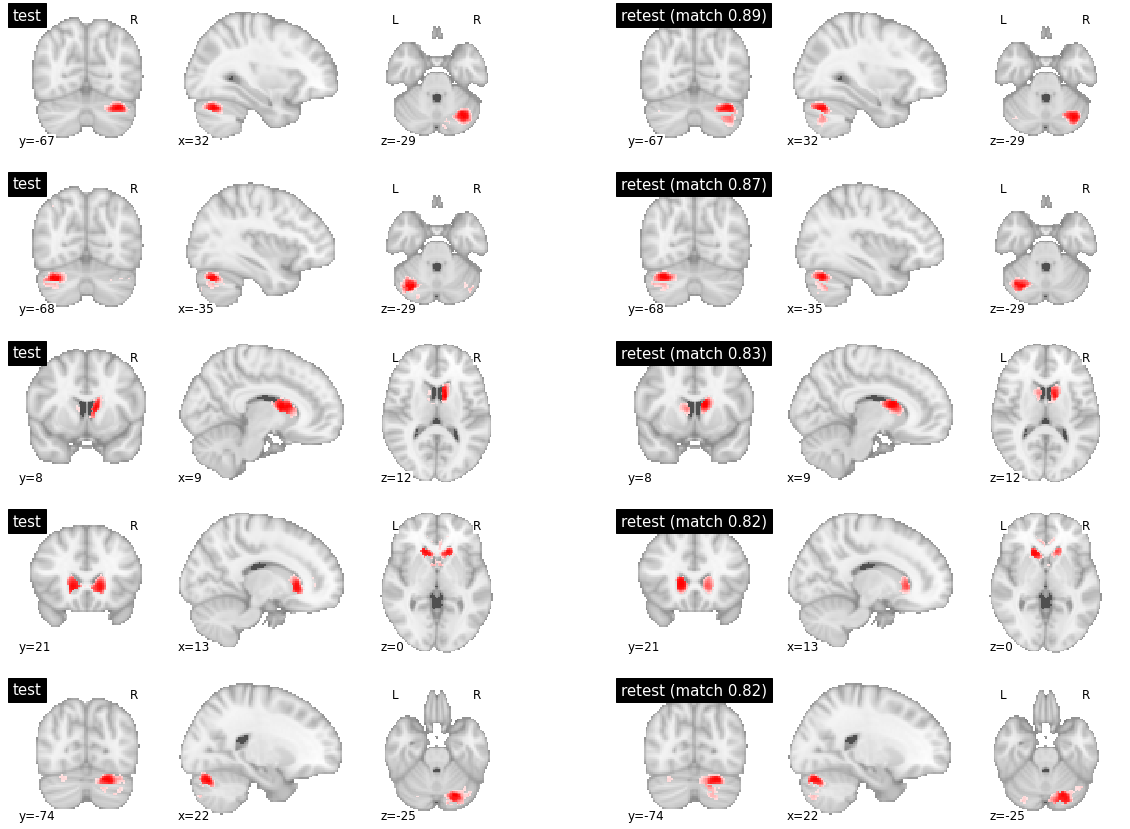

In [7]:
visu_match(0, 5, model1, model2, order, match_pair, match_val)

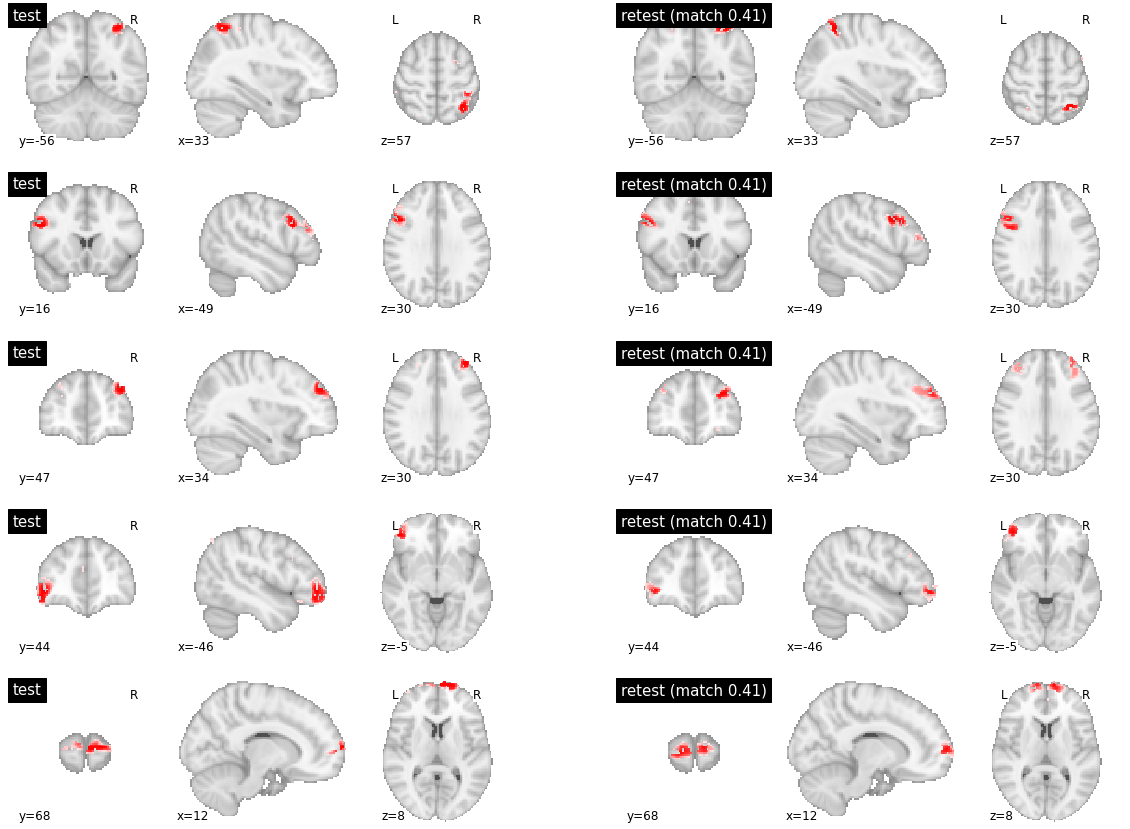

In [8]:
visu_match(450, 5, model1, model2, order, match_pair, match_val)

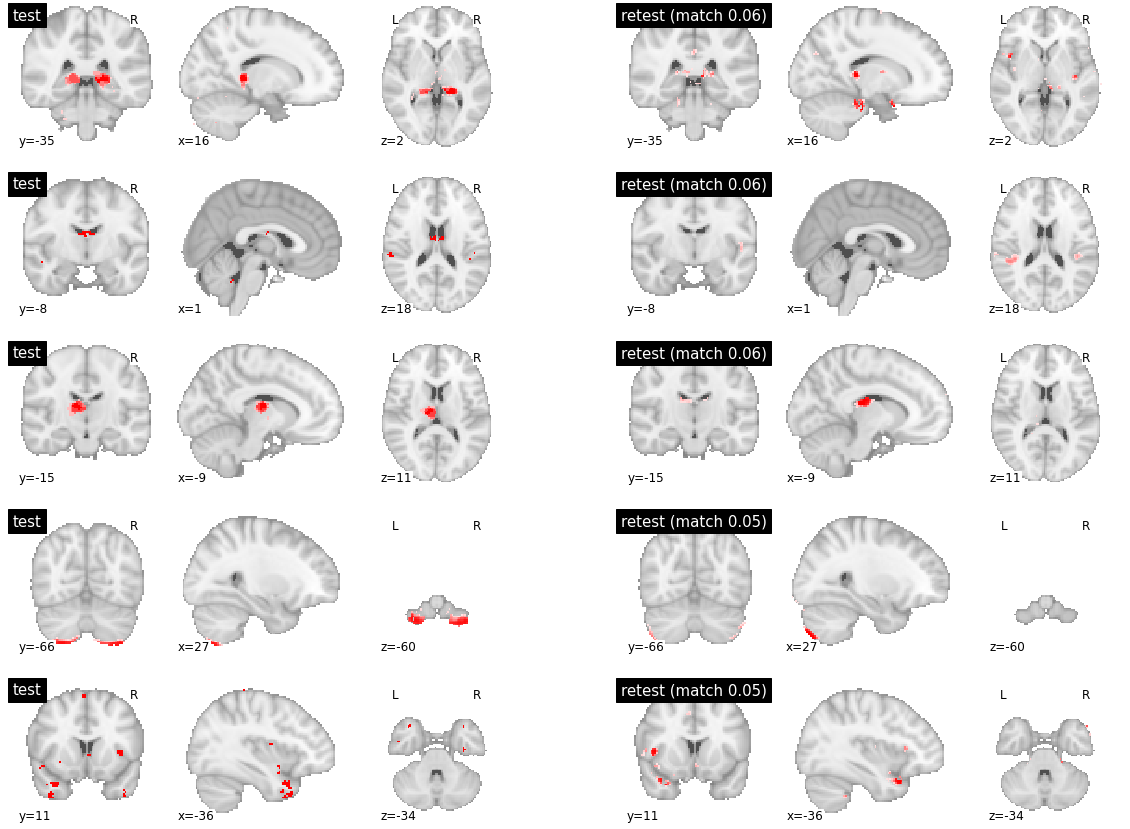

In [9]:
visu_match(850, 5, model1, model2, order, match_pair, match_val)